# Algorithm #

In [361]:
from PIL import Image
import numpy
import matplotlib.pyplot as plt
import math
import operator
import cv2

## Load Image ##

In [362]:
def loadImage(path, name):
    image = cv2.imread('{path}/{name}'.format(path=path,name=name))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = 255 - image
    return numpy.asarray(image)

def thinnImage(image):
    image = cv2.ximgproc.thinning(image)
    return image

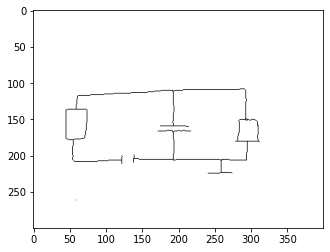

In [363]:
image = loadImage("./testImages","1.png")
image = cv2.resize(image, (400,300), interpolation = cv2.INTER_AREA)

#for y in range(0,len(image)):
#    for x in range(0, len(image[y])):
#        if image[y][x] > 110:
#            image[y][x] = 255
#        else:
#            image[y][x] = 0

cv2.imwrite("out.png", 255 - image)

image = thinnImage(image)

cv2.imwrite("thinn.png", 255 - image)

plt.imshow(image, cmap=plt.cm.binary)

## Filter ##

Only odd numbers for filter lengths

In [364]:
def getImagePart(filter, x, y):
    imagePart = numpy.empty_like(filter)
    imagePart[:] = filter
    yOffset = -math.floor(len(imagePart)/2)
    for fy in range(0 + yOffset, len(imagePart) + yOffset):
        xOffset = -math.floor(len(imagePart[0])/2)
        for fx in range(0 + xOffset, len(imagePart[0]) + xOffset):
            try:
                imagePart[fy - yOffset][fx - xOffset] = image[y + fy][x + fx]
            except:
                imagePart[fy - yOffset][fx - xOffset] = 0
    return imagePart

def whiteFilter(image):
    filter = numpy.asarray([[0,0,0],[0,0,0],[0,0,0]])
    image = numpy.asarray(image)
    features = numpy.empty_like(image)
    features[:] = image
    for y in range(0,len(image)):
        for x in range(0,len(image[y])):
            if (filter == getImagePart(filter, x, y)).all():
                features[y][x] = 255
            else:
                features[y][x] = 0
    return features

def applyFilter(filter, image, points):
    image = numpy.asarray(image)
    features = []
    for (x, y) in points:
        if (filter == getImagePart(filter, x, y)).all():
            features.append((x,y))
    return features

In [365]:
whiteFeatures = whiteFilter(image)
points = []
for y in range(0, len(whiteFeatures)):
    for x in range(0, len(whiteFeatures[y])):
        if whiteFeatures[y][x] == 0:
            points.append((x,y))

In [366]:
filters = []
filters.append([[0,0,0],[0,255,255],[0,0,0]])
filters.append([[255,0,0],[0,255,0],[0,0,0]])

endPointFilters = []
for filter in filters:
    for k in range(0,4):
        endPointFilters.append(numpy.rot90(filter, k))

endPoints = []
for filter in endPointFilters:
    endPoints = endPoints + applyFilter(filter, image, points)
print(endPoints)


filters = []
filters.append([[0,0,0],[255,255,255],[0,255,0]])
filters.append([[0,0,0],[255,0,255],[0,255,0]])
filters.append([[255,0,0],[0,255,255],[0,255,0]])
filters.append([[0,0,255],[255,255,255],[0,255,0]])
filters.append([[255,0,0],[255,255,255],[0,255,0]])

intersectionFilters = []
for filter in filters:
    for k in range(0,4):
        intersectionFilters.append(numpy.rot90(filter, k))

intersections = []
for filter in intersectionFilters:
    intersections = intersections + applyFilter(filter, image, points)
print(intersections)


[(175, 159), (172, 166), (279, 180), (241, 224), (138, 209), (122, 211), (214, 160), (217, 166), (139, 199), (312, 181), (274, 224), (122, 200)]
[(55, 178), (295, 180), (59, 136), (193, 159), (282, 180), (310, 180), (259, 223), (122, 206), (122, 201), (284, 152), (259, 206), (139, 204), (193, 205), (193, 111), (193, 167), (293, 149)]


Mark end points red and intersections green

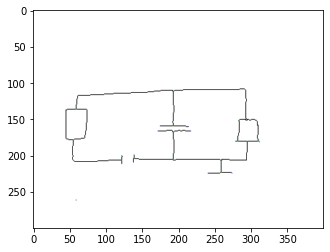

In [367]:
outImage = []
for y in range(0,len(image)):
    row = []
    for x in range(0,len(image[y])):
        if image[y][x] >= 1:
            row.append((0,0,0))
        else:
            row.append((255,255,255))
    outImage.append(row)
    
for point in endPoints:
    outImage[point[1]][point[0]] = (0,0,255)

for point in intersections:
    outImage[point[1]][point[0]] = (0,255,0)

cv2.imwrite("points.png", numpy.asarray(outImage))
    
plt.imshow(outImage, interpolation='bilinear')